In [1]:
import performance_functions
from CKA_functions import fix_dataset_shape,load_dataset
from torch.utils.data import DataLoader
from torch import argmax
import torch
import importlib
importlib.reload(performance_functions)
from performance_functions import *

In [2]:
data_path = "../Datasets/"
X = load_dataset("test_set.pkl",data_path)


In [3]:
from CKA_functions import load_model
model_path = "../models/shallow/Shallow_59_4788347.pth"
model = load_model("Shallow_59_4788347.pth","../models/shallow/")
model

ShallowFBCSPNet(
  (temporal): Conv2d(1, 10, kernel_size=(1, 25), stride=(1, 1))
  (spatial): Conv2d(10, 20, kernel_size=(22, 1), stride=(1, 1))
  (batch_norm): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): AvgPool2d(kernel_size=(1, 20), stride=(1, 20), padding=0)
  (dropout): Dropout(p=0.7, inplace=False)
  (fc): Linear(in_features=1100, out_features=4, bias=True)
)

In [4]:
test_loader = DataLoader(X, batch_size=16)

In [5]:
all_preds,all_truths = get_labels(model,dataloader=test_loader)
print(len(all_preds))
print(all_preds)
print(len(all_truths))
print(all_truths)

2592
tensor([1, 2, 2,  ..., 0, 1, 1])
2592
tensor([1, 2, 2,  ..., 0, 1, 0])


In [6]:
acc = compute_accuracy(all_preds,all_truths)
print(acc)

0.5848765432098766


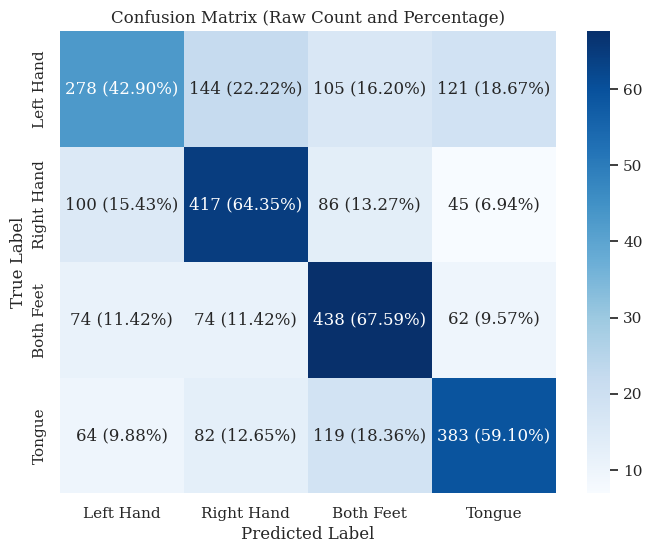

In [7]:
compute_class_confusions(all_preds,all_truths)

In [8]:
compute_all_model_confusion("../models","all_model_conf")

Classification report saved to: all_model_conf\ShallowLSTMNet_report.txt
Classification report saved to: all_model_conf\ShallowRNNNet_report.txt
Classification report saved to: all_model_conf\ShallowSGCNNet_report.txt
Classification report saved to: all_model_conf\ShallowFBCSPNet_report.txt
Classification report saved to: all_model_conf\ShallowAttentionNet_report.txt
{'LSTM': 0.5813782964877546, 'RNN': 0.5685966280326762, 'SGCN': 0.5387619178843261, 'shallow': 0.5944016740784968, 'SpatAttention': 0.4918252655753135}

Summary Table of Metrics:
        Class   TP   FP   FN    TN    Chi2  p-value
0   Left Hand  272  375  243  1696  263.00      0.0
1  Right Hand  425  221  324  1616  565.20      0.0
2   Both Feet  461  186  300  1639  724.13      0.0
3      Tongue  358  288  203  1737  573.87      0.0

Summary Table of Metrics:
        Class   TP   FP   FN    TN    Chi2  p-value
0   Left Hand  273  373  267  1671  236.06      0.0
1  Right Hand  396  250  294  1644  524.41      0.0
2   Both